Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn import metrics


This is just to check if boston dataset is still present in sklearn. If not then how to get it



In [ ]:
# house_data = sklearn.datasets.load_boston() ##error

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
variable_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Target_name = ['MEDV']
df = pd.DataFrame(data,columns=variable_names)

In [4]:
df['Price'] = target

Statisticall measures

In [5]:
df.isnull().sum()
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
boston = df.copy()

In [7]:
std_list = boston.iloc[:,:-1].std()

From different standard deviation we can see that the units of each column is different and hence we need to standardize our data

0.11587767566755595 168.53711605495903


(array([6., 3., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 array([1.15877676e-01, 7.11587768e+00, 1.41158777e+01, 2.11158777e+01,
        2.81158777e+01, 3.51158777e+01, 4.21158777e+01, 4.91158777e+01,
        5.61158777e+01, 6.31158777e+01, 7.01158777e+01, 7.71158777e+01,
        8.41158777e+01, 9.11158777e+01, 9.81158777e+01, 1.05115878e+02,
        1.12115878e+02, 1.19115878e+02, 1.26115878e+02, 1.33115878e+02,
        1.40115878e+02, 1.47115878e+02, 1.54115878e+02, 1.61115878e+02,
        1.68115878e+02]),
 <BarContainer object of 24 artists>)

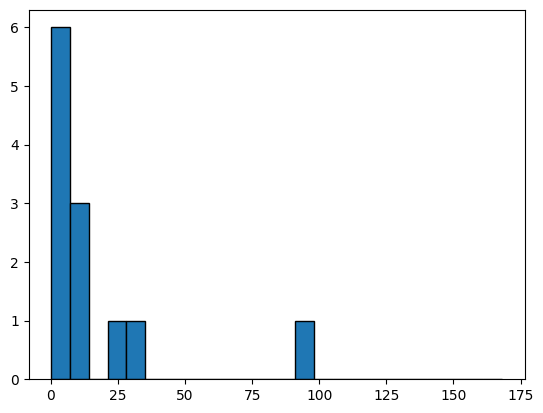

In [8]:
print(min(std_list),max(std_list))
bin_size = np.arange(min(std_list),max(std_list)+1,7)
plt.hist(std_list,bins=bin_size,density=False,edgecolor='black')

Data Standardization

In [9]:
standard = StandardScaler()

In [10]:
boston_standard = standard.fit_transform(boston.iloc[:,:-1])

In [16]:
boston = pd.DataFrame(boston_standard,columns=df.iloc[:,:-1].columns)

In [22]:
boston['Price'] = df['Price']

Correlation Analysis

In [24]:
correlation = boston.corr()

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8},cmap='Blues')

In [26]:
X = boston.drop(columns='Price',axis=1)
Y = boston.drop(boston.columns[:-1],axis=1)

Data Splitting

In [27]:
X_learn,X_exam,Y_learn,Y_exam = train_test_split(X,Y, test_size=0.2,random_state=3)

Model installing

In [28]:
xgmodel = XGBRegressor()

Data Training

In [ ]:
xgmodel.fit(X_learn,Y_learn)

Checking accuarcy of model on training data

In [30]:
#Accuracy checking for training data
Y_predict_learn = xgmodel.predict(X_learn)

r_score_learn = metrics.r2_score(Y_learn,Y_predict_learn)
mae_learn = metrics.mean_absolute_error(Y_learn,Y_predict_learn)

Checking accuarcy of model on testing data

In [31]:
#Accuracy checking for test data
Y_predict_exam = xgmodel.predict(X_exam)

r_score_exam = metrics.r2_score(Y_exam,Y_predict_exam)
mae_exam = metrics.mean_absolute_error(Y_exam,Y_predict_exam)

In [32]:
print('Train')
print(f'R sqaure:{r_score_learn} | MAE:{mae_learn}')
print('Test')
print(f'R sqaure:{r_score_exam} | MAE:{mae_exam}')

Train
R sqaure:0.9999968327963358 | MAE:0.011230918676546346
Test
R sqaure:0.9022178792512646 | MAE:2.127565305373248


Visualizing actual and predicted value of testing dataset

Text(0, 0.5, 'Predicted Price')

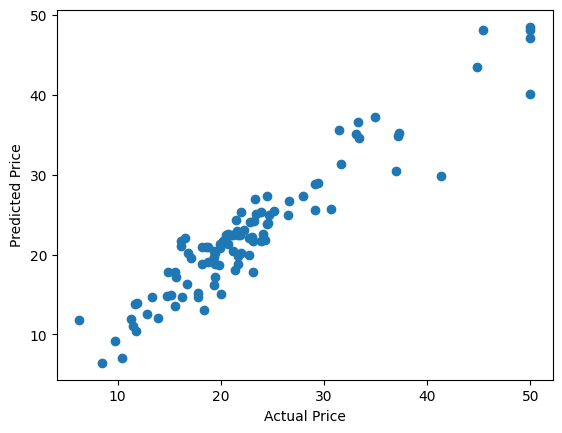

In [33]:
plt.scatter(Y_exam,Y_predict_exam)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')